# Load Data

In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/selected_features_reviews.csv")
print("Data shape:", df.shape)
df.head()


Data shape: (10381, 26)


,cleaned_text,sentiment_binary,has_upvotes,review_length,exclamation_count,question_count,ngram_great app,ngram_good app,ngram_easy use,ngram_love app,...,ngram_really like app,ngram_app easy use,ngram_buy pro version,ngram_using app years,ngram_paid pro version,ngram_really good app,ngram_simple easy use,ngram_used app years,ngram_sync google calendar,ngram_todo list app
0,cannot open app anymore,0.0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,begging refund app month nobody replying,0.0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,costly premium version approx indian rupees pe...,0.0,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,used keep organized updates made mess things c...,0.0,0,23,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,dan birthday oct,0.0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print("\nColumns:", df.columns.tolist())
df.info()
print("\nMissing values:")
print(df.isnull().sum())


Columns: ['cleaned_text', 'sentiment_binary', 'has_upvotes', 'review_length', 'exclamation_count', 'question_count', 'ngram_great app', 'ngram_good app', 'ngram_easy use', 'ngram_love app', 'ngram_pro version', 'ngram_google calendar', 'ngram_free version', 'ngram_use app', 'ngram_like app', 'ngram_doesnt work', 'ngram_really like app', 'ngram_app easy use', 'ngram_buy pro version', 'ngram_using app years', 'ngram_paid pro version', 'ngram_really good app', 'ngram_simple easy use', 'ngram_used app years', 'ngram_sync google calendar', 'ngram_todo list app']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10381 entries, 0 to 10380
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cleaned_text                10381 non-null  object 
 1   sentiment_binary            10381 non-null  float64
 2   has_upvotes                 10381 non-null  int64  
 3   review_length               10381 no

# Sentiment Distribution


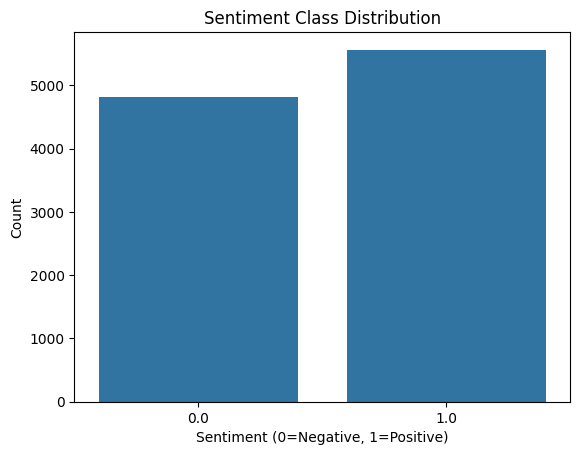

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_binary', data=df)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

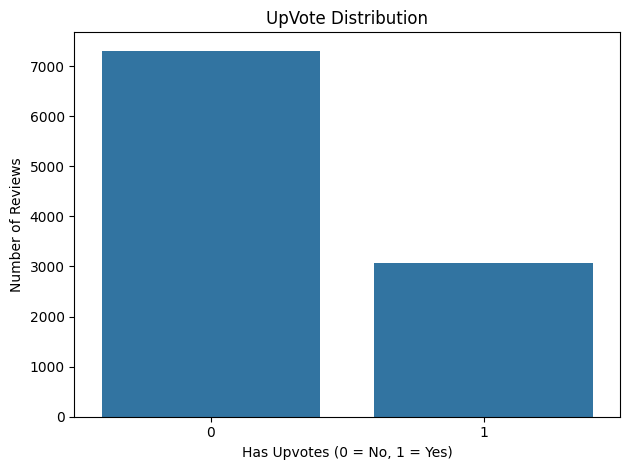

In [4]:
sns.countplot(data=df, x='has_upvotes')
plt.title("UpVote Distribution")
plt.xlabel("Has Upvotes (0 = No, 1 = Yes)")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()



# Review Length Distribution


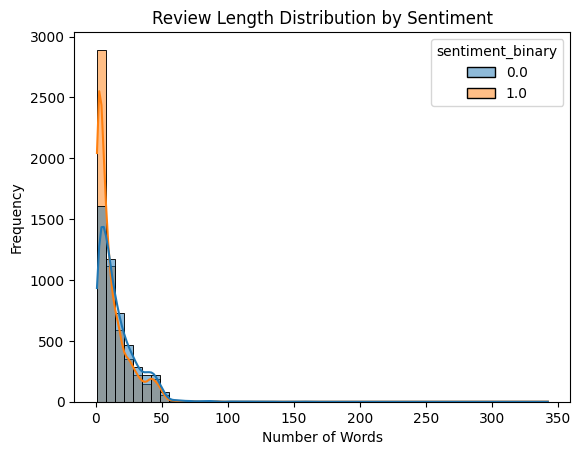

In [5]:
sns.histplot(data=df, x='review_length', hue='sentiment_binary', bins=50, kde=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Boxplots for Numeric Features


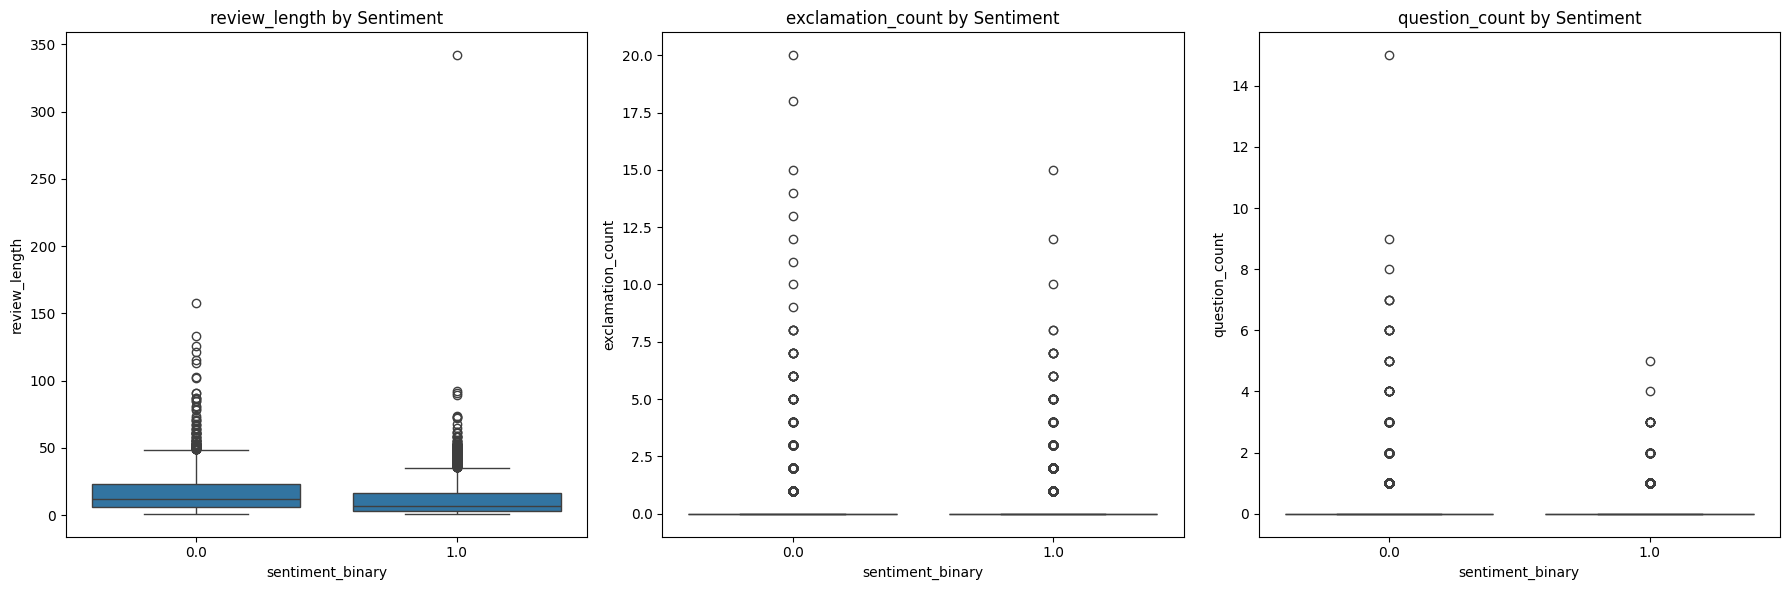

In [20]:
features = ['review_length', 'exclamation_count', 'question_count']
fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 6))
if len(features) == 1:
    axes = [axes]  # ensure axes is iterable
for i, feat in enumerate(features):
    sns.boxplot(x='sentiment_binary', y=feat, data=df, ax=axes[i])
    axes[i].set_title(f'{feat} by Sentiment')
plt.tight_layout()
plt.show()

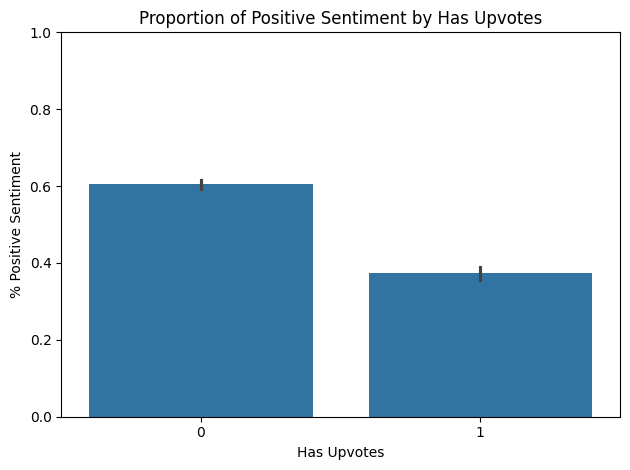

In [7]:
import numpy as np

sns.barplot(
    data=df,
    x='has_upvotes',
    y='sentiment_binary',
    estimator=np.mean
)
plt.title('Proportion of Positive Sentiment by Has Upvotes')
plt.xlabel('Has Upvotes')
plt.ylabel('% Positive Sentiment')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Correlation Heatmap


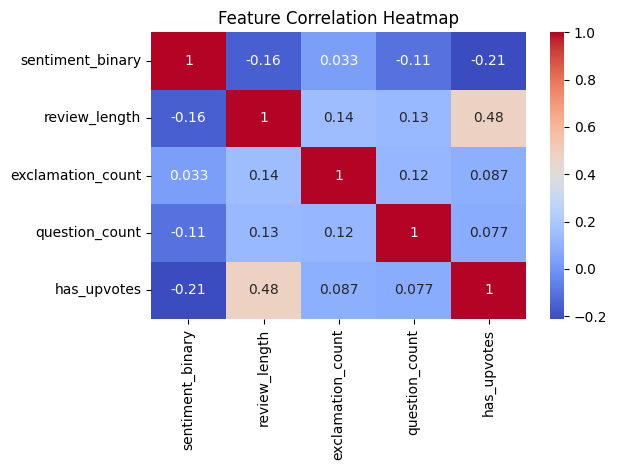

In [8]:
import numpy as np

corr_features = ['sentiment_binary', 'review_length', 'exclamation_count', 'question_count', 'has_upvotes']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Word Clouds

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = nltk.word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
        return ' '.join(tokens)
    return ''

if 'cleaned_text' not in df.columns:
    df['cleaned_text'] = df['content'].apply(preprocess_text)

pos_text = ' '.join(df[df['sentiment_binary'] == 1]['cleaned_text'])
neg_text = ' '.join(df[df['sentiment_binary'] == 0]['cleaned_text'])

WordCloud(background_color='white').generate(pos_text).to_image().show()
WordCloud(background_color='white').generate(neg_text).to_image().show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nissidom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nissidom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nissidom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Top Words by Sentiment


Top bigrams: [('great app', np.int64(444)), ('good app', np.int64(295)), ('easy use', np.int64(291)), ('love app', np.int64(286)), ('pro version', np.int64(212)), ('google calendar', np.int64(205)), ('free version', np.int64(189)), ('use app', np.int64(156)), ('like app', np.int64(153)), ('doesnt work', np.int64(151))]
Top trigrams: [('really like app', np.int64(41)), ('app easy use', np.int64(33)), ('buy pro version', np.int64(29)), ('using app years', np.int64(29)), ('paid pro version', np.int64(22)), ('really good app', np.int64(22)), ('simple easy use', np.int64(22)), ('used app years', np.int64(21)), ('sync google calendar', np.int64(20)), ('todo list app', np.int64(20))]


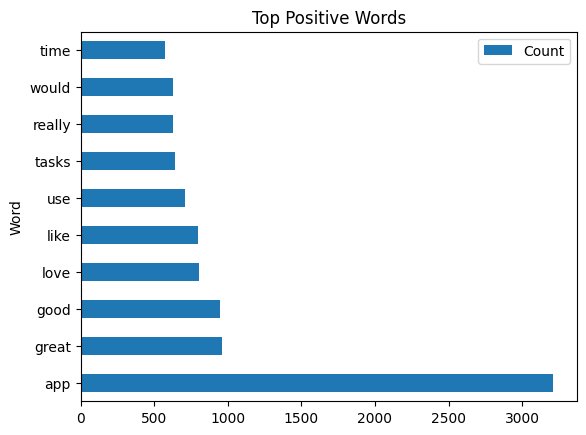

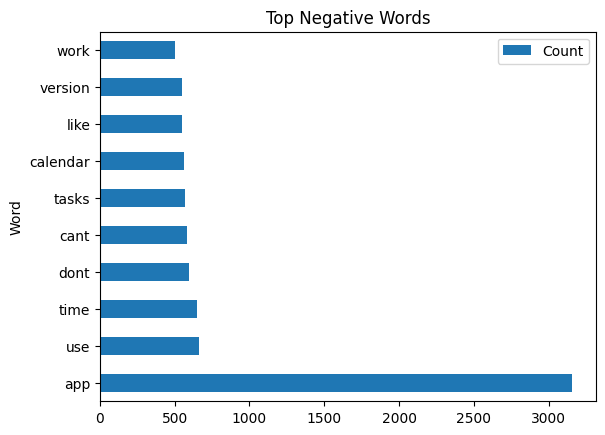

In [10]:
from collections import Counter

def get_top_words(texts, n=10):
    words = ' '.join(texts).split()
    return Counter(words).most_common(n)

top_pos = get_top_words(df[df['sentiment_binary'] == 1]['cleaned_text'])
top_neg = get_top_words(df[df['sentiment_binary'] == 0]['cleaned_text'])

pd.DataFrame(top_pos, columns=['Word', 'Count']).plot(kind='barh', x='Word', title='Top Positive Words')
pd.DataFrame(top_neg, columns=['Word', 'Count']).plot(kind='barh', x='Word', title='Top Negative Words')


# CELL 9: Top Bigrams and Trigrams as Summary (Optional)
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text_series, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(text_series)
    counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    return sorted(zip(vocab, counts), key=lambda x: x[1], reverse=True)[:top_k]

print("Top bigrams:", get_top_ngrams(df['cleaned_text'], 2))
print("Top trigrams:", get_top_ngrams(df['cleaned_text'], 3))

# Feature Importance with Logistic Regression


/var/folders/9w/xm58r8m14kl4z9q_7yh3w2y00000gn/T/ipykernel_85084/2898104167.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='abs_coef', y='Feature', palette='viridis')


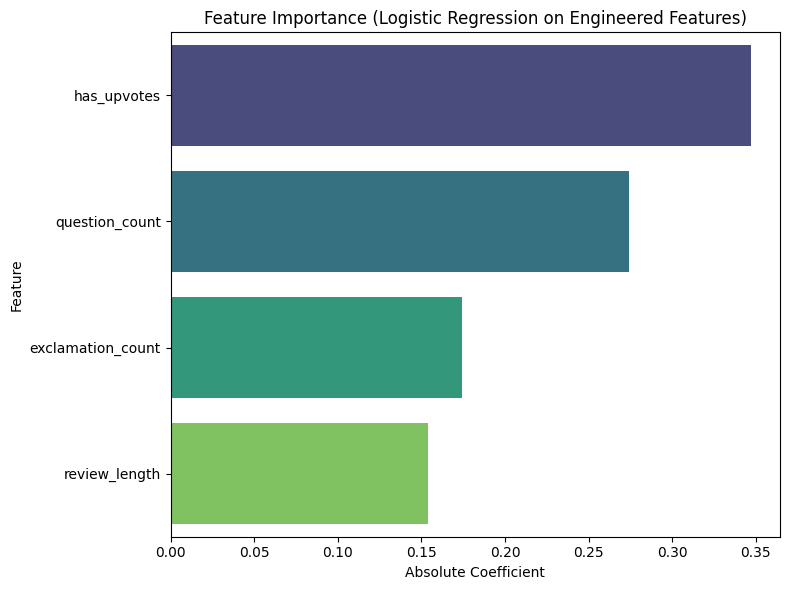

In [17]:
# engineered numeric features
selected_features = [
    'review_length',
    'exclamation_count',
    'question_count',
    'has_upvotes'
]
X = df[selected_features]
y = df['sentiment_binary']
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get importance
coefs = model.coef_[0]
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefs,
    'abs_coef': np.abs(coefs)
}).sort_values('abs_coef', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=coef_df, x='abs_coef', y='Feature', palette='viridis')
plt.title("Feature Importance (Logistic Regression on Engineered Features)")
plt.xlabel("Absolute Coefficient")
plt.tight_layout()
plt.show()


In [19]:
df[selected_features + ['sentiment_binary']].corr()['sentiment_binary'].sort_values(ascending=False)


sentiment_binary     1.000000
exclamation_count    0.032504
question_count      -0.107542
review_length       -0.158838
has_upvotes         -0.212105
Name: sentiment_binary, dtype: float64